# Librerías

In [ ]:
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Sklearn**

In [ ]:
from sklearn.cluster import KMeans

(1013, 1800, 3)


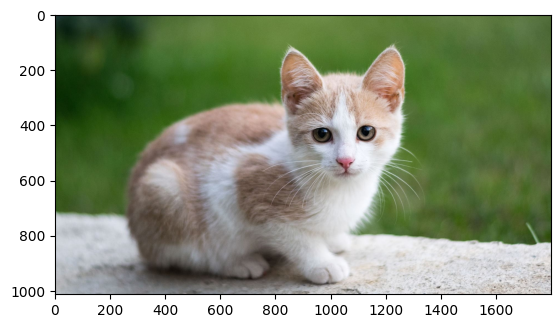

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Gato.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
print(img1.shape)

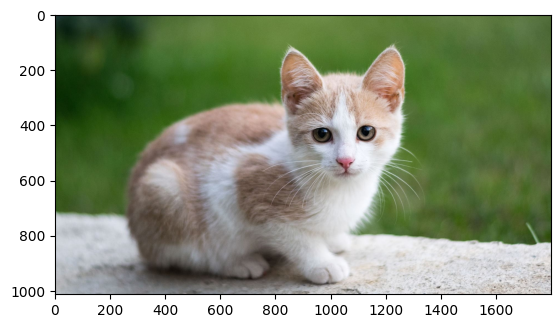

In [ ]:
plt.imshow(img1) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
img2_n  = img2.reshape((-1,3))
print(img2_n.shape)

(1823400, 3)


## k-means

In [ ]:
#img2 = np.array(img2_n)
#img2

array([[ 44],
       [ 65],
       [ 66],
       ...,
       [201],
       [197],
       [198]], dtype=uint8)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(img2_n)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [ ]:
centers = kmeans.cluster_centers_
print(centers)

[[ 87.37526571 109.86057644  58.78434154]
 [154.77799069 144.96838123 139.6411886 ]
 [ 45.79666979  76.26198851  27.01832439]
 [213.02940781 210.89610119 212.89643864]]


In [ ]:
centers = np.array(centers,dtype='uint8')
centers

array([[ 87, 109,  58],
       [154, 144, 139],
       [ 45,  76,  27],
       [213, 210, 212]], dtype=uint8)

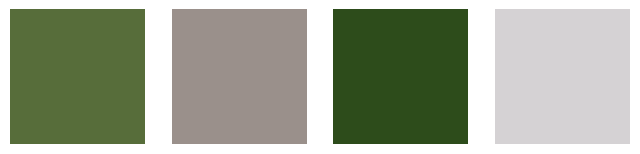

In [ ]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)


In [ ]:
new_img = np.zeros((1013*1800,3),dtype='uint8')
print(new_img.shape)

(1823400, 3)


In [ ]:
colors

[array([ 87, 109,  58], dtype=uint8),
 array([154, 144, 139], dtype=uint8),
 array([45, 76, 27], dtype=uint8),
 array([213, 210, 212], dtype=uint8)]

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

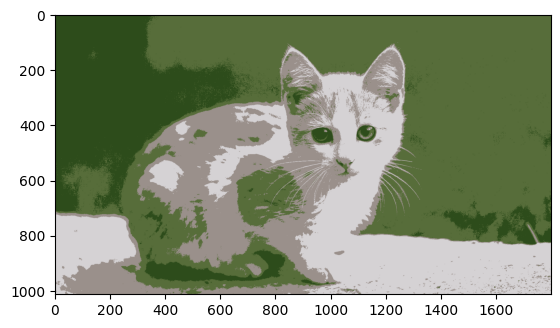

In [ ]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmeans.labels_[ix]]

new_img = new_img.reshape((img1_shape))
plt.imshow(new_img)
plt.show()

# **CV2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## K-means clustering

In [ ]:
from google.colab.patches import cv2_imshow

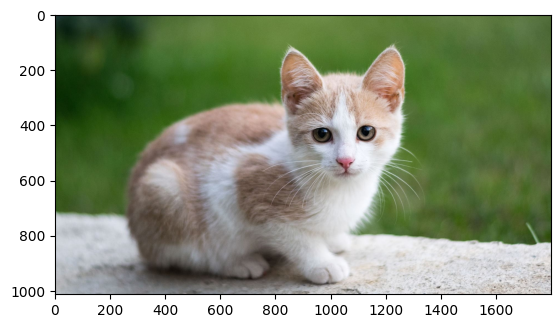

In [ ]:
import numpy as np
import cv2 as cv2
#from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Gato.jpg')
Z = img.reshape((-1,3))


img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

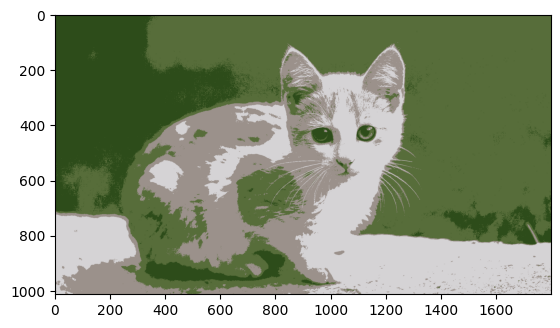

In [ ]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img2.shape))
res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)

plt.imshow(res2)